# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('prepped_churn_data2.csv', index_col='customerID')
df

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Month-to-month,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,TotalCharges_MonthlyCharges_ratio,AverageMonthlyCharges,MonthlyCharges_tenure_Ratio
customerID,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,0,1,0,0,1,0,1.000000,29.850000,29.850000
5575-GNVDE,34,56.95,1889.50,0,1,0,0,0,0,1,33.178227,55.573529,1.675000
3668-QPYBK,2,53.85,108.15,1,1,1,0,0,0,1,2.008357,54.075000,26.925000
7795-CFOCW,45,42.30,1840.75,0,0,0,1,0,0,0,43.516548,40.905556,0.940000
9237-HQITU,2,70.70,151.65,1,1,1,0,0,1,0,2.144979,75.825000,35.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,84.80,1990.50,0,1,0,0,0,0,1,23.472877,82.937500,3.533333
2234-XADUH,72,103.20,7362.90,0,1,0,0,1,0,0,71.345930,102.262500,1.433333
4801-JZAZL,11,29.60,346.45,0,0,1,0,0,1,0,11.704392,31.495455,2.690909


In [3]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

### Decision Tree Sklearn Optamized Hyperparameters with GridSearchCV

At first I tested the max_depth parameter iteratively to find the results with the least amount of overfitting. The result was 3. 

I did the same process last week to find the perfect predictive lower threshold (.155) for creating the linear regression ml model.

Along with the guess-and-check method I also used Hyperparameter Optimization tools to fine tune accuracy and precision of the decision tree. Max accuracy for predicting churn was 79% which is consistent with last week's results.

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
cross_validation = KFold(n_splits=3,
                        shuffle=True,
                        random_state=42)
for depth in range(1,5):
    tree_classifier = tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=50, min_samples_leaf=10, random_state=42)
    if tree_classifier.fit(x_train, y_train).tree_.max_depth < depth: 
        break
score = np.mean(cross_val_score(tree_classifier,
                               x_train, y_train,
                               scoring = 'accuracy',
                               cv=cross_validation))

print('Depth: %i Accuracy: %.3f' %(depth,score))
print(tree_classifier.score(x_train, y_train))
print(tree_classifier.score(x_test, y_test))

Depth: 4 Accuracy: 0.792
0.7986348122866894
0.7861205915813424


In [5]:
tree_classifier.get_depth()

4

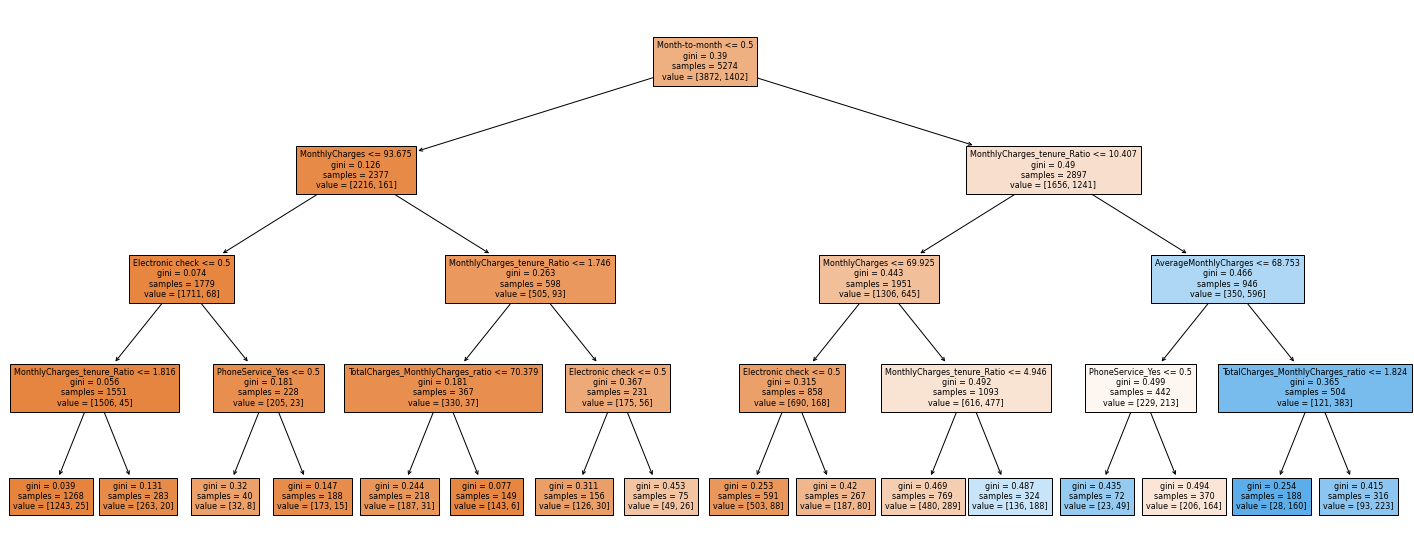

In [6]:
f = plt.figure(figsize=(25, 10))
_ = plot_tree(tree_classifier, fontsize=8, feature_names=features.columns, filled=True)

In [7]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(tree_classifier,

                            max_samples=0.8,

                            max_features=6,                      

                            n_estimators=100,
                           random_state=42)

scores = np.mean(cross_val_score(bagging, x_train, y_train,

                                 scoring='accuracy',

                                 cv=cross_validation))

print ('Accuracy: %.3f' % scores)

Accuracy: 0.797


I see an improvement with the bagging method by .5% where the parameters max_samples, max_features, and n_estimators optimized via guess-and-check. Later I changed the max_features and n_estimators to the values I found with other optimizing tools.

### Random Forest Modeling with GridSearchCV and Gradient Boosting

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_estimators as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


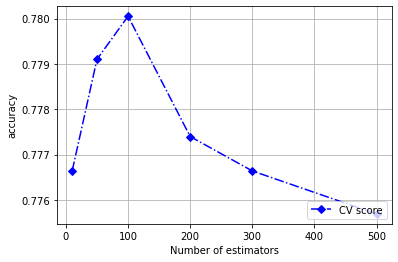

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
RF_cls = RandomForestClassifier(n_estimators = 300,
                                   random_state = 42)
RF_cls.fit(x_train,y_train)

param_range = [10, 50, 100, 200, 300, 500]
train_scores, test_scores = validation_curve(RF_cls, x_train, y_train,

                                  'n_estimators',

                                  param_range=param_range,

                                  cv=cross_validation,

                                  scoring='accuracy')
mean_test_scores = np.mean(test_scores, axis=1)

plt.plot(param_range, mean_test_scores,

         'bD-.', label='CV score')

plt.grid()

plt.xlabel('Number of estimators')

plt.ylabel('accuracy')

plt.legend(loc='lower right', numpoints= 1)

plt.show()

The results above provide the optimal estimators for the most accurate predictions of churn (n_estimators = 100)

In [9]:
from sklearn.ensemble import RandomForestRegressor
RF_rg = RandomForestRegressor (n_estimators=100,

                               random_state=42)
score = np.mean(cross_val_score(RF_rg, x_train, y_train,

                    scoring='neg_mean_squared_error',

                    cv=cross_validation))
print('Mean squared error: %.3f' % abs(score))

Mean squared error: 0.156


The regression has a small regression error of .156 bit it is not significant enough to create non-correlated interpretations.

In [10]:
max_features = [x_train.shape[1]//3, 'sqrt', 'log2', 'auto']

min_samples_leaf = [1, 10, 30]

n_estimators = [50, 100, 300]

scorer = 'accuracy'

search_grid =  {'n_estimators':n_estimators,

                'max_features': max_features,

                'min_samples_leaf': min_samples_leaf}

search_func = GridSearchCV(estimator=RF_cls,

                           param_grid=search_grid,

                           scoring=scorer,

                           cv=cross_validation)

search_func.fit(x_train, y_train)

best_params = search_func.best_params_

best_score = search_func.best_score_

print('Best parameters: %s' % best_params)

print('Best accuracy: %.3f' % best_score)

Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 300}
Best accuracy: 0.799


In [11]:
RF_cls = RandomForestClassifier(max_depth=3,
                                n_estimators = 50,
                                max_features = 'sqrt',
                                min_samples_leaf=30,
                                random_state = 42)
RF_cls.fit(x_train,y_train)
score = np.mean(cross_val_score(RF_cls,
                                x_train,y_train, 
                                scoring = 'accuracy', 
                                cv=cross_validation))
print('Depth: %i Accuracy: %3.f' % (depth,score))

Depth: 4 Accuracy:   1


In [12]:
print(RF_cls.score(x_train, y_train))
print(RF_cls.score(x_test, y_test))

0.7937049677664012
0.7844141069397043


### Correlation Matrix and Feature Importance

<AxesSubplot:>

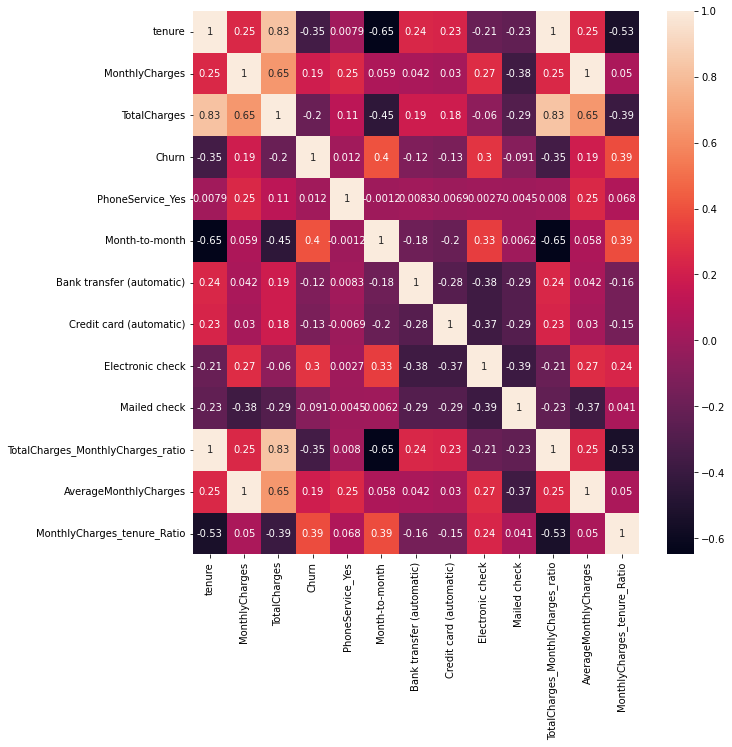

In [13]:
import seaborn as sns
f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

Here I can predict that PhoneService is very low in importance. Meanwhile, TotalCharges, MonthlyCharges, Month-to-month, and Tenure have the most importance.

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'PhoneService_Yes', 'Month-to-month', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check', 'TotalCharges_MonthlyCharges_ratio', 'AverageMonthlyCharges', 'MonthlyCharges_tenure_Ratio']


<AxesSubplot:>

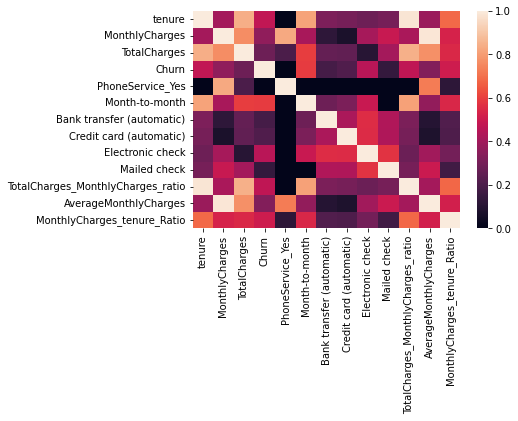

In [14]:
import phik
sns.heatmap(df.phik_matrix())

In [15]:
import phik
df.phik_matrix()

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'PhoneService_Yes', 'Month-to-month', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check', 'TotalCharges_MonthlyCharges_ratio', 'AverageMonthlyCharges', 'MonthlyCharges_tenure_Ratio']


,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,Month-to-month,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,TotalCharges_MonthlyCharges_ratio,AverageMonthlyCharges,MonthlyCharges_tenure_Ratio
tenure,1.000000,0.409989,0.842068,0.473761,0.000000,0.812700,0.318255,0.304353,0.278598,0.302384,0.983912,0.383574,0.685738
MonthlyCharges,0.409989,1.000000,0.762904,0.359623,0.831671,0.415552,0.122163,0.073689,0.413444,0.489479,0.419250,0.984375,0.530162
TotalCharges,0.842068,0.762904,1.000000,0.280973,0.197820,0.595118,0.257836,0.251356,0.104866,0.408464,0.846719,0.771933,0.545969
Churn,0.473761,0.359623,0.280973,1.000000,0.000000,0.592976,0.182983,0.208592,0.455248,0.140289,0.472054,0.329954,0.507465
PhoneService_Yes,0.000000,0.831671,0.197820,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.723219,0.120079
Month-to-month,0.812700,0.415552,0.595118,0.592976,0.000000,1.000000,0.278133,0.315405,0.495984,0.000000,0.811267,0.366317,0.539672
Bank transfer (automatic),0.318255,0.122163,0.257836,0.182983,0.000000,0.278133,1.000000,0.422608,0.557848,0.436355,0.313410,0.100955,0.212830
Credit card (automatic),0.304353,0.073689,0.251356,0.208592,0.000000,0.315405,0.422608,1.000000,0.553544,0.432792,0.304345,0.080244,0.204369
Electronic check,0.278598,0.413444,0.104866,0.455248,0.000000,0.495984,0.557848,0.553544,1.000000,0.570443,0.275047,0.401870,0.293560
Mailed check,0.302384,0.489479,0.408464,0.140289,0.000000,0.000000,0.436355,0.432792,0.570443,1.000000,0.302721,0.497996,0.168481


<AxesSubplot:title={'center':'Feature Importance'}>

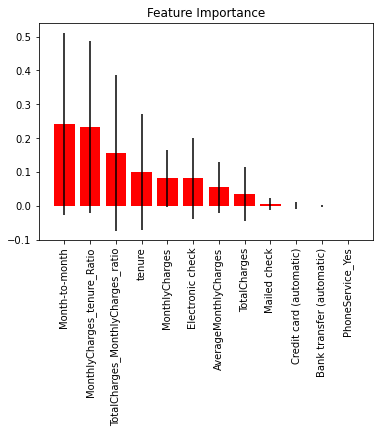

In [16]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(RF_cls, feature_names=features.columns, x_tick_rotation=90)

I was almost there. According to the feature importance plot above phoneservice is low as I predicted before. Total Charges didnt have as high of an importance as I thought based on the correlation matrix values. Below I have removed the 4 features on the right tail of the plot above.

In [17]:
new_features = features.drop(['PhoneService_Yes', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

RF_cls = RandomForestClassifier(max_depth=3, max_features=6, random_state=42)
RF_cls.fit(x_train, y_train)

score = np.mean(cross_val_score(RF_cls,
                                x_train,y_train, 
                                scoring = 'accuracy', 
                                cv=cross_validation))

print('Depth: %i Accuracy: %3.f' % (depth,score))
print(RF_cls.score(x_train, y_train))
print(RF_cls.score(x_test, y_test))

Depth: 4 Accuracy:   1
0.7956010618126659
0.7815699658703071


<AxesSubplot:title={'center':'Feature Importance'}>

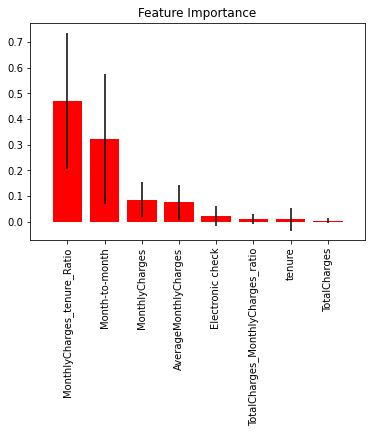

In [18]:
plot_feature_importances(RF_cls, feature_names=new_features.columns, x_tick_rotation=90)

There was a shift in which variables were more important.

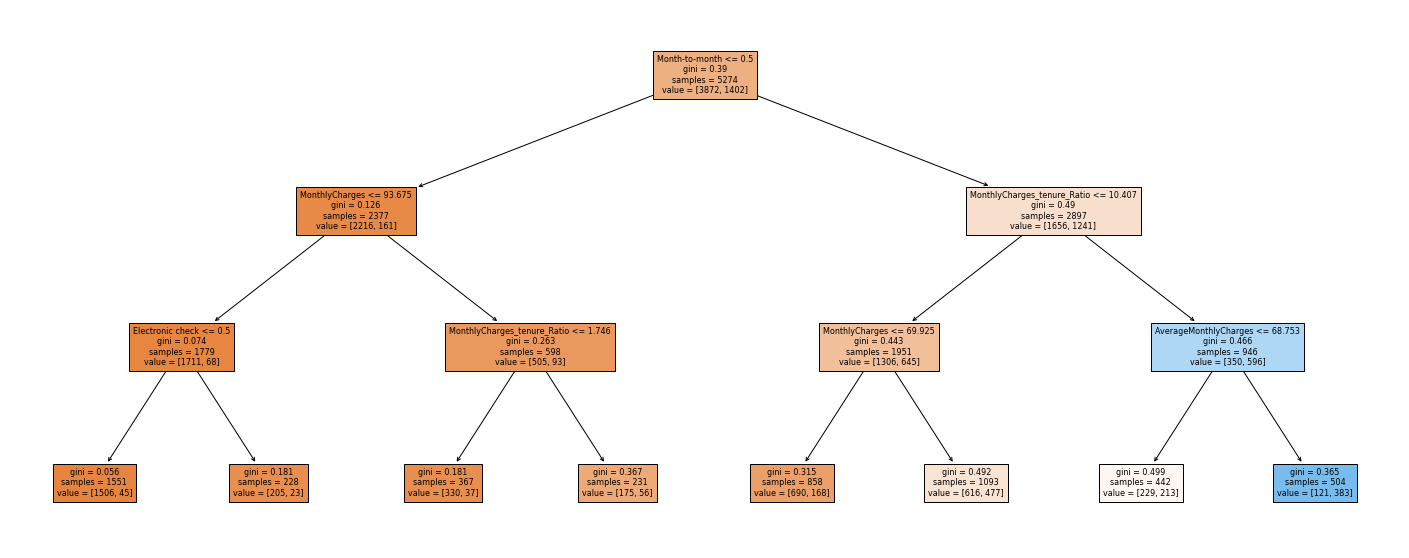

In [19]:
dt= tree.DecisionTreeClassifier(max_depth=3, 
                                min_samples_split=50, 
                                min_samples_leaf=10, 
                                random_state=42)
dt.fit(x_train, y_train)
score = np.mean(cross_val_score(dt,
                               x_train, y_train,
                               scoring = 'accuracy',
                               cv=cross_validation))

f = plt.figure(figsize=(25, 10))
_ = plot_tree(dt, fontsize=8, feature_names=new_features.columns, filled=True)

# Summary

This process took many iterations to optimize and it is still only calculating churn with 79% accuracy with a slight over-fit. The data is interesting. Phone service did not play a role as much as I thought it did last week. 

When optimized, the decision tree splits the sample at Month-to-month. 

If MonthlyCharges are less than or equal \\$93.68 and the customer pays via Electronic Check, the customer is likely to stay with the company. If the ratio of the customer's Monthly Charges are less than or equal to 1.7x the number of months the customer has been with the company, they will likely stay with the company.

If the month-to-month customer has monthly charges that amount less than or equal to 10x their tenure, they may go either way depending on their Total Charges to Tenure ratio and their current Monthly Charges. If their currently monthly charges are around \\$69.93 the customer has almost a 50% of churning but this is not a solid correlation. If the Average Total Monthly Charges for the entire tenure of the customer's account is around \\$68.75 They also have about a 50% chance of churning.

I think the split_sample coming from a categorical feature may make this harder to interpret. That said it does repeat our preditions from previous weeks about the monthly charges reaching above \\$60 that causes customers to churn, and later at the $90-100 range.
